Found 14000 validated image filenames belonging to 10 classes.
Found 4000 validated image filenames belonging to 10 classes.
Found 6000 validated image filenames belonging to 10 classes.
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,579,978 (13.66 MB)

 Trainable params: 1,321,994 (5.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/2


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


875/875 ━━━━━━━━━━━━━━━━━━━━ 148s 162ms/step - accuracy: 0.9306 - loss: 0.2332 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 2/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 136s 155ms/step - accuracy: 0.9902 - loss: 0.0343 - val_accuracy: 0.9980 - val_loss: 0.0076
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.9975 - loss: 0.0106


250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step


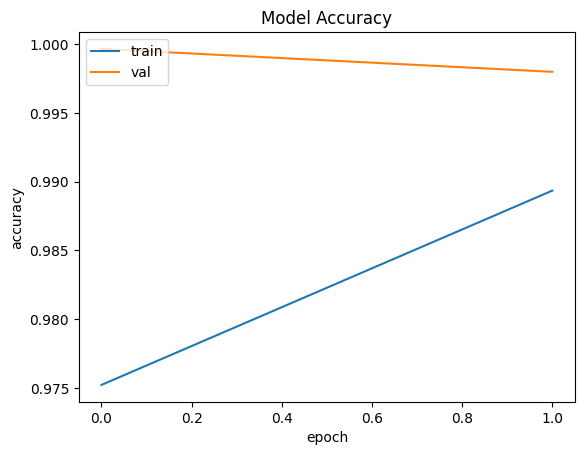

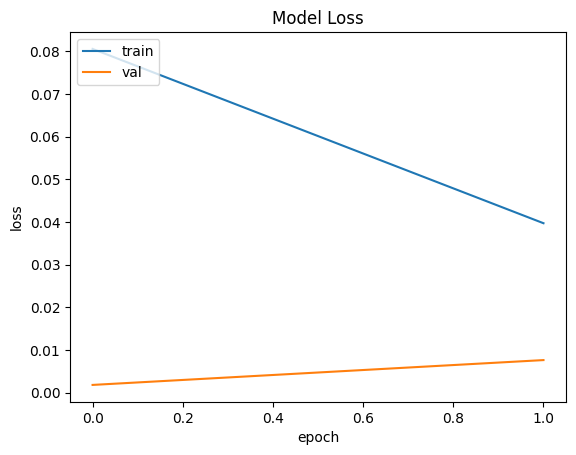

               precision    recall  f1-score   support

      01_palm       1.00      0.99      1.00       417
         02_l       0.99      1.00      1.00       404
      03_fist       1.00      1.00      1.00       404
04_fist_moved       1.00      1.00      1.00       418
     05_thumb       1.00      1.00      1.00       377
     06_index       1.00      1.00      1.00       392
        07_ok       1.00      1.00      1.00       403
08_palm_moved       1.00      1.00      1.00       409
         09_c       1.00      1.00      1.00       410
      10_down       1.00      1.00      1.00       366

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000

Model Accuracy: 99.9%


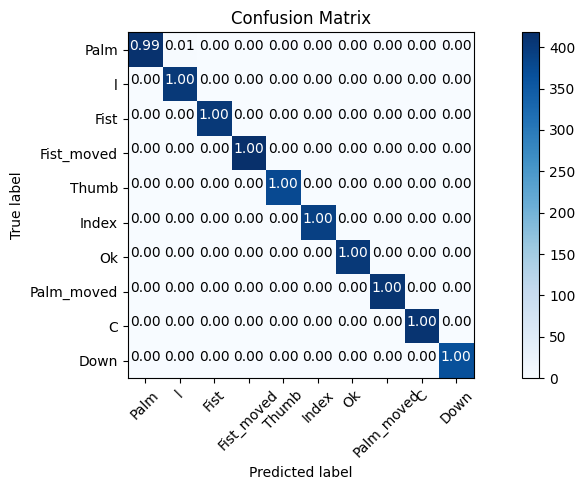

In [30]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
dir = r'D:\folder\leapGestRecog'
images = []
labels = []
for directory in os.listdir(dir):
    for subDir in os.listdir(os.path.join(dir, directory)):
        for img in os.listdir(os.path.join(dir, directory, subDir)):
            img_path = os.path.join(dir, directory, subDir, img)
            images.append(img_path)
            labels.append(subDir)
Iseries = pd.Series(images, name="Images")
Lseries = pd.Series(labels, name="labels")
hand_gesture_data = pd.concat([Iseries, Lseries], axis=1)
hand_gesture_df = pd.DataFrame(hand_gesture_data)
X_train, X_test = train_test_split(hand_gesture_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(hand_gesture_df, test_size=0.3, random_state=42)
image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(
    dataframe=train_set, x_col="Images", y_col="labels",
    target_size=(128, 128),  
    color_mode='rgb',
    class_mode="categorical",
    batch_size=16,
    shuffle=False
)
test = image_gen.flow_from_dataframe(
    dataframe=X_test, x_col="Images", y_col="labels",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=16,
    shuffle=False
)
val = image_gen.flow_from_dataframe(
    dataframe=val_set, x_col="Images", y_col="labels",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=16,
    shuffle=False
)
classes = list(train.class_indices.keys())
print(classes)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()
history = model.fit(train, epochs=2, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)
model.save("hand_gesture_Model_fast.h5")
pred = model.predict(test)
pred = np.argmax(pred, axis=1)
labels = (train.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred2 = [labels[k] for k in pred]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_test = X_test.labels
print(classification_report(y_test, pred2))
print("Model Accuracy: {:.1f}%".format(accuracy_score(y_test, pred2) * 100))
class_labels = ['Palm', 'l', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(10, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, "{:.2f}".format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()